# Feature calculation and plot

In [1]:
import os
import numpy as np
import librosa

import matplotlib.pyplot as plt
from matplotlib import cm

from preprocessing_sig2feat import *
from ysp_func import *

In [2]:
path0 = "C:/Users/" + os.getenv('USERNAME') +"/Desktop/DCASE2024-Task10-Dataset/simulation/"
gen_name = 'gen_sound_v3'
list_file_path = list_all_file_path(f'{path0}{gen_name}')

In [3]:
# fs = 16000
fframe = 2**10      # 1024
delay = int(fframe/4)    # 256

### Feature preprocessing
- sig load / sig to feature / standardization

In [7]:
file_nn = 10     # 1~600

file_path = list_file_path[file_nn]
sig, fs = librosa.load(file_path, sr=None, mono=False)
sig = sig / np.max(np.abs(sig))

feat1 = feature_spectrogram(sig, fs, fframe)
feat1 = standardization(feat1)

feat2 = feature_sthd(sig, fs, fframe, delay)
feat2 = standardization(feat2)

## Feauture plot

In [5]:
print(f'feat1 shape : {feat1.shape}')
print(f'feat2 shape : {feat2.shape}')

feat1 shape : (128, 1876, 4)
feat2 shape : (128, 1876, 6)


In [6]:
num_ch1 = 4;         # spectrogram 4ch
num_ch2 = 6;         # sthd 6ch

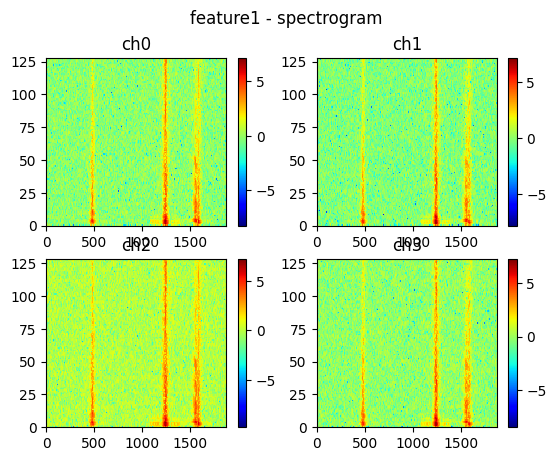

In [8]:
# feat1 plot

plt.figure()
plt.suptitle('feature1 - spectrogram')
for nn in range(num_ch1):
    plt.subplot(2,2,nn+1)
    plt.pcolormesh(feat1[:,:,nn])    
    plt.jet()    
    plt.colorbar()
    plt.title(f'ch{nn}')  
plt.show()

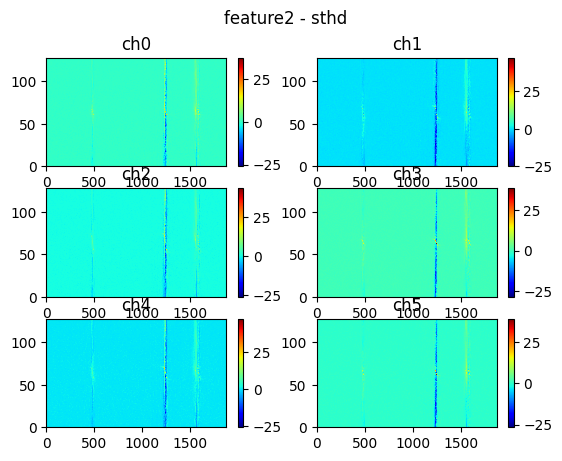

In [9]:
# feat2 plot
plt.figure()
plt.suptitle('feature2 - sthd')
for nn in range(num_ch2):
    plt.subplot(3,2,nn+1)
    plt.pcolormesh(feat2[:,:,nn])    
    plt.jet()    
    plt.colorbar()
    plt.title(f'ch{nn}')    
plt.show()

### Feature preprocessing (GPU version)
- sig load / sig to feature / standardization
- tensor

In [10]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [15]:
file_nn = 10     # 1~600

file_path = list_file_path[file_nn]
sig, fs = librosa.load(file_path, sr=None, mono=False)
sig = sig / np.max(np.abs(sig))

sig_tensor = torch.tensor(sig, dtype=torch.float32)        
sig_tensor = sig_tensor.to(device)      # Move tensor to GPU if CUDA is available

feat1 = feature_spectrogram_tensor(sig, fs, fframe, device)
feat1 = standardization_tensor(feat1)
feat1 = feat1.cpu()

feat2 = feature_sthd_tensor(sig, fs, fframe, delay, device)
feat2 = standardization_tensor(feat2)
feat2 = feat2.cpu()

In [16]:
print(f'feat1 shape : {feat1.shape}')
print(f'feat2 shape : {feat2.shape}')

feat1 shape : torch.Size([128, 1876, 4])
feat2 shape : torch.Size([128, 1876, 6])


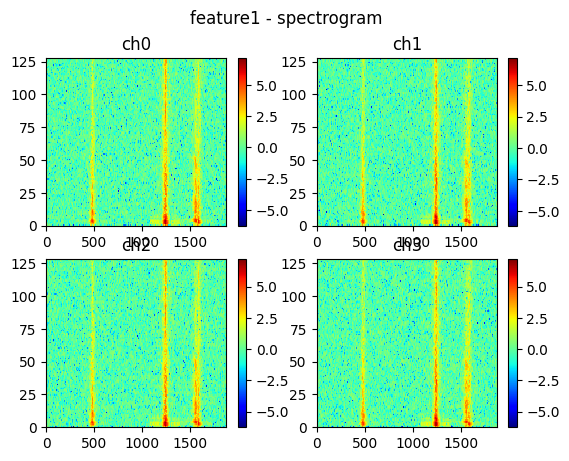

In [17]:
# feat1 plot
plt.figure()
plt.suptitle('feature1 - spectrogram')
for nn in range(num_ch1):
    plt.subplot(2,2,nn+1)
    plt.pcolormesh(feat1[:,:,nn])    
    plt.jet()    
    plt.colorbar()
    plt.title(f'ch{nn}')  
plt.show()

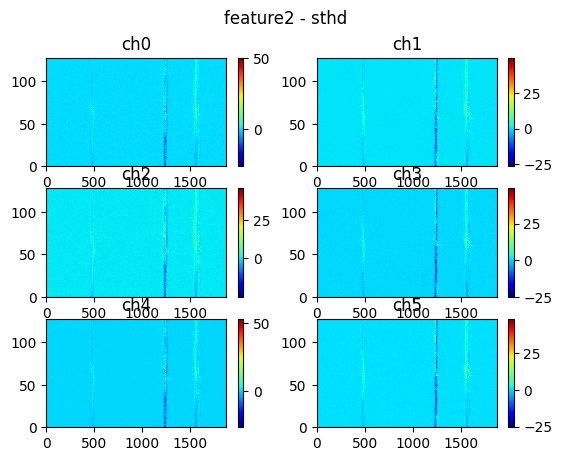

In [18]:
# feat2 plot
plt.figure()
plt.suptitle('feature2 - sthd')
for nn in range(num_ch2):
    plt.subplot(3,2,nn+1)
    plt.pcolormesh(feat2[:,:,nn])    
    plt.jet()    
    plt.colorbar()
    plt.title(f'ch{nn}')    
plt.show()